# Business Context

###AMAZON INDIA

## Data available

(https://www.kaggle.com/code/daominhthong/amazon-sale-report-eda-and-analysis/input)

The data set appears to be taken from an Amazon India sales report.



###The Client company needs a data scientist in optimize sales performance, improve fulfillment efficiency and maximize revenue. A Data scientist can give the data-driven insights helps in improving revenue, stream logistics and enhance customer experience.

#Business Problem
###The Company faces challenges in optimizing sales performance, order fulfillment and customer satisfaction due to high order cancellations, delivery inefficiencies and unclear demand patterns.





##Data Quality Issues in the Dataset
- Missing values The currency and Amount columns have 7800 missing values.
- ship-city, ship-state, ship-postal-code, and ship-country have 35 missing values
- fulfilled-by have 90,000 missing values.
- New and PendingS columns are completely empty.
- The Date column is stored as an object (string) instead of a datetime format.
- Contains Inconsistent values & Outliers.


##Interesting Metadata from the Dataset
- All sales appear to be from Amazon.in, which indicates a single marketplace source.
- The dataset differentiates between Amazon Fulfillment and Merchant Fulfillment
- Includes statuses like Shipped, Delivered, and Cancelled, which could provide insights into return rates and logistics issues.
- A boolean B2B column is present, allowing segmentation between business and individual customers.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df = pd.read_csv('/content/drive/MyDrive/data sets/Amazon india Sale Report.csv')

In [42]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [7]:
df.shape

(128976, 21)

#checking missing values

In [8]:
df.isnull().sum()


,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [10]:
df.dtypes

,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Category,object
Size,object
Courier Status,object


#Data Preprocessing

#converting datetime columns from object to datetime

In [11]:
df[['Date']] = df[['Date']].apply(pd.to_datetime)

<ipython-input-11-0be2cd3793b6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[['Date']] = df[['Date']].apply(pd.to_datetime)


#Cleaning missing data


In [12]:
df.drop(df[df['currency'].isnull()==True].index,axis=0,inplace=True)

In [13]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [14]:
df.drop(df[df['ship-city'].isnull()==True].index,axis=0,inplace=True)

In [15]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


#dropping unnecessary columns

In [16]:
columns_to_drop = ['New', 'PendingS', 'fulfilled-by']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns_to_drop, axis=1, inplace=True)

In [17]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [18]:
df.shape

(121143, 18)

#Checking Outliers

<Axes: ylabel='Amount'>

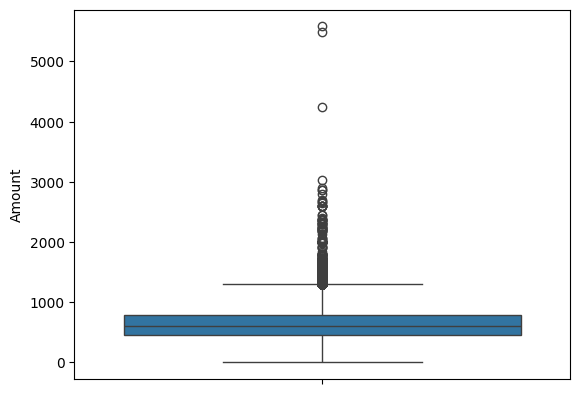

In [19]:
sns.boxplot(df['Amount'])

In [25]:
df['Amount'].quantile(0.98)

np.float64(1349.0)

In [26]:
df[df['Amount']>df['Amount'].quantile(0.98)].shape

(2313, 19)

In [27]:
df.drop(df[df['Amount']>df['Amount'].quantile(0.98)].index,axis=0,inplace=True)

<Axes: ylabel='Amount'>

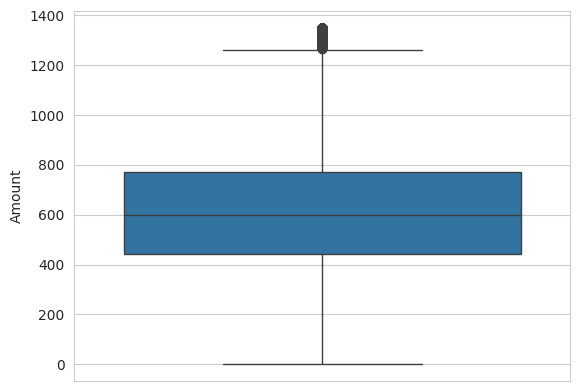

In [28]:
sns.boxplot(y=df['Amount'])

#Explanatory Data Analysis

#Business Questions

###1.What are the top selling product Categories?

In [20]:
#Visualization style for clear observation
sns.set_style("whitegrid")

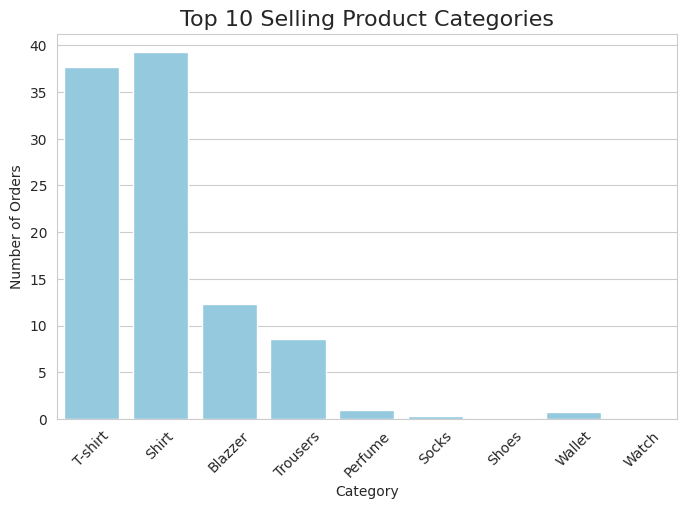

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Category'], stat='percent',color="skyblue")
plt.title("Top 10 Selling Product Categories", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

###Findings
- T-Shirts are 39% and shirts 38.7% make up most sales.
- These categories are the most profitable. Future promotions can focus on them.

###2.Which Cities contribute the most sales

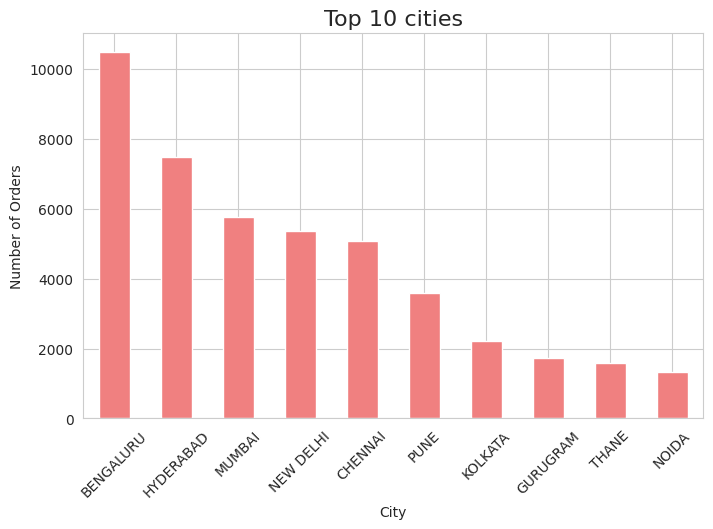

In [33]:
plt.figure(figsize=(8,5))
df['ship-city'].value_counts().head(10).plot(kind="bar", color="lightcoral")
plt.title("Top 10 cities", fontsize=16)
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

###Findings
- Bangalore 8.7% , Hyderabad 6.3% and Mumbai 4.8% lead in sales
- Targeted marketing in these cities could increase revenue.

###3.What are the peak order months

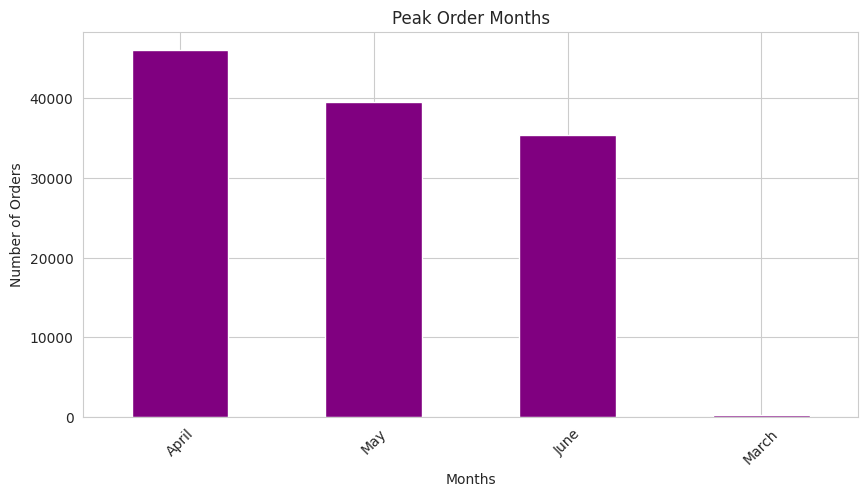

In [23]:
df['Month'] = df['Date'].dt.month_name()
monthly_orders = df['Month'].value_counts()
plt.figure(figsize=(10,5))
monthly_orders.plot(kind='bar', color = 'purple')
plt.title("Peak Order Months")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

##Findings
- April, May and June are the peak order months.
- Identifying peak months helps with inventory planning

###4.How many orders get cancelled in percentage?

<ipython-input-24-716e875b2864>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Status'],stat='percent',palette='crest')


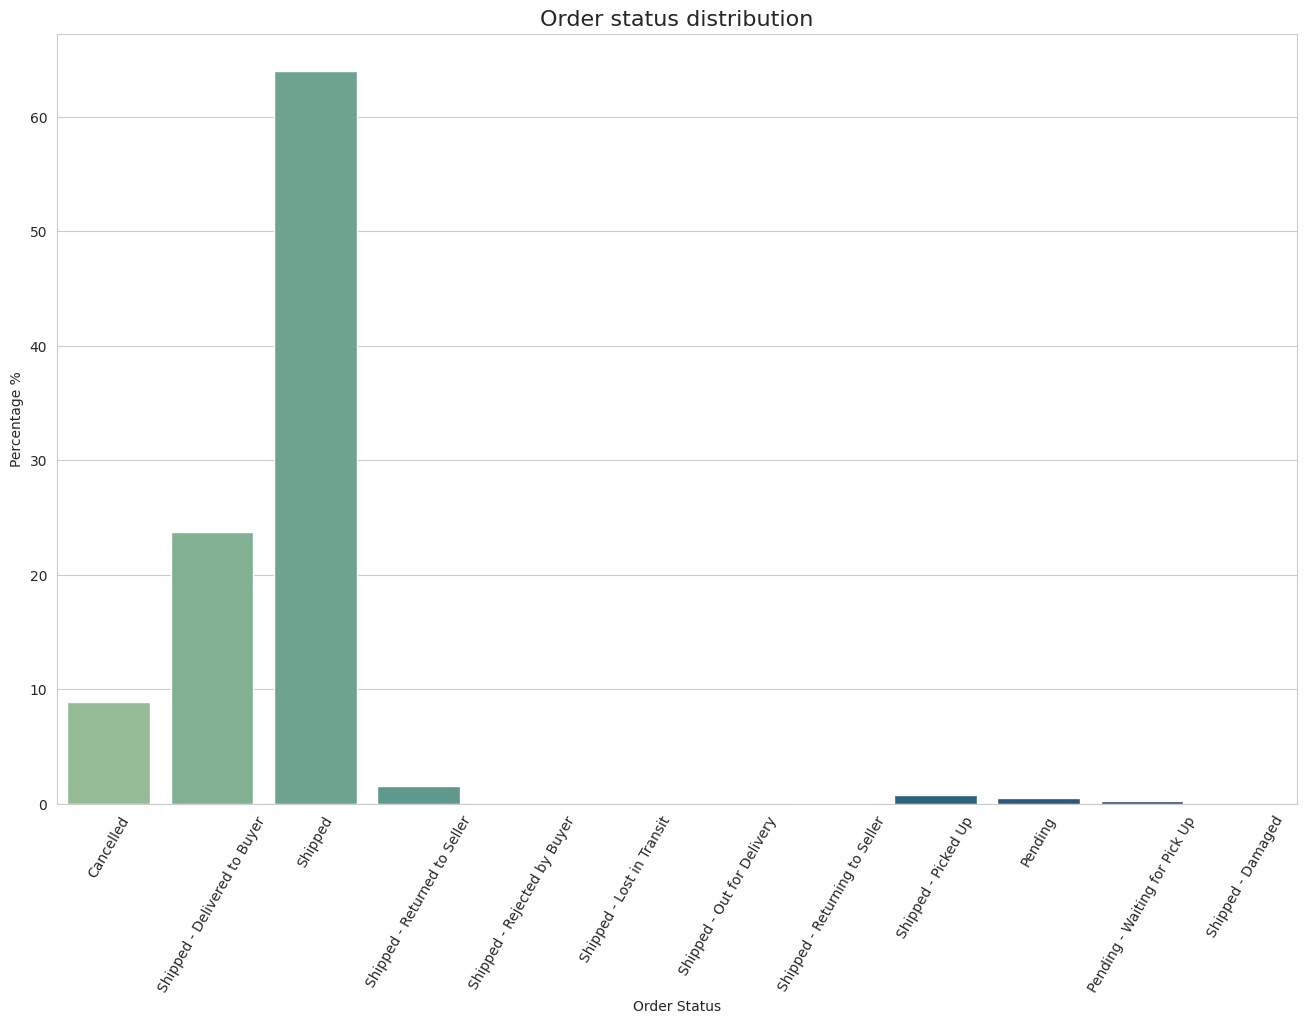

In [24]:
plt.figure(figsize=(16,10))
sns.countplot(x=df['Status'],stat='percent',palette='crest')
plt.title("Order status distribution", fontsize=16)
plt.xlabel("Order Status")
plt.ylabel("Percentage %")
plt.xticks(rotation=60)
plt.show()

###Findings
- 9% of Orders are cancelled
- A high cancellation rate may indicate pricing issues, stock unavailability or customer dissatisfaction.

###5. Order Quantity Impact on Revenue?

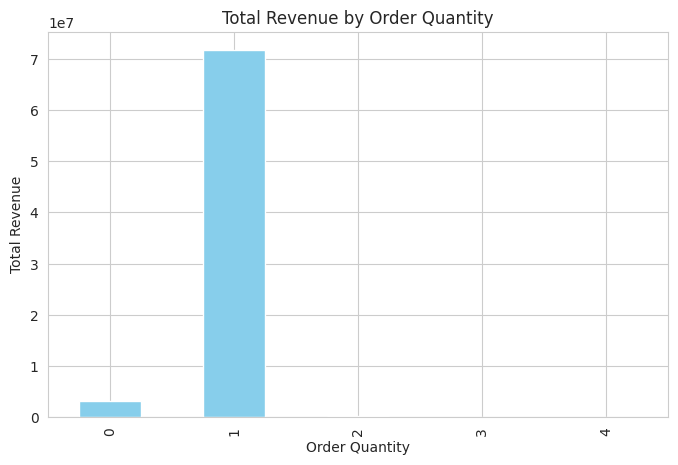

In [34]:
quantity_revenue = df.groupby("Qty")['Amount'].sum()
plt.figure(figsize=(8,5))
quantity_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Order Quantity")
plt.xlabel("Order Quantity")
plt.ylabel("Total Revenue")
plt.show()

###Findings:
- The most common order quantity is 1 item per order.
- Orders with higher quantities contribute more to total revenue.
- Offering bulk discounts may encourage customers to order more.


###6. How many orders returned and its return rate in percentage?

In [35]:
returned_orders = df[df['Status'].str.contains('Return', na=False)].shape[0]
print(f"Total Returned Orders: {returned_orders}")
return_rate = (returned_orders / df.shape[0]) * 100
print(f"Return Rate: {return_rate:.2f}%")


Total Returned Orders: 2039
Return Rate: 1.72%


###Findings
- The return rate is 1.72%, which is relatively low, indicating that most customers are satisfied with their purchases
- A total of 2,039 orders were returned, even a small percentage of returns can indicate potential areas for improvement, such as product quality, delivery accuracy, or customer support efficiency.



##7. What type of products are returned most?


In [36]:
returned_products = df[df['Status'].str.contains('Return', na=False)]['Category'].value_counts()
print("Most Returned Products:")
print(returned_products)

Most Returned Products:
Category
T-shirt     790
Shirt       744
Blazzer     341
Trousers    129
Perfume      16
Wallet       12
Socks         6
Shoes         1
Name: count, dtype: int64


##Findings
-  T-shirts are 790, Shirts are 744, and Blazers are (341) these are the highest number of returns, indicating potential issues with size, fit, quality, or customer expectations.

- For high-return categories like T-shirts and Shirts, provide more detailed size charts, customer reviews, and product descriptions to help customers make informed choices.

##8. What are most ordered size in each product?

In [37]:
size_counts = df.groupby('Category')['Size'].value_counts()
print("Most Ordered Sizes:")
print(size_counts)

Most Ordered Sizes:
Category  Size
Blazzer   L       2675
          M       2457
          XL      2237
          S       2090
          XXL     2034
          3XL     1825
          XS      1334
Perfume   Free    1072
Shirt     L       8334
          XL      8156
          M       7946
          XXL     7177
          3XL     5355
          S       5355
          XS      2887
          6XL      631
          5XL      468
          4XL      357
Shoes     Free     153
Socks     L         71
          XL        70
          S         69
          3XL       64
          XXL       64
          M         55
          XS        27
T-shirt   M       8351
          L       7393
          XL      6799
          S       6581
          XXL     5546
          3XL     5260
          XS      4798
          5XL       39
          6XL       37
          4XL       28
Trousers  XL      1786
          M       1745
          XXL     1724
          L       1698
          S       1174
          3XL     1136

###Findings
- In Blazers, Shirts, T-shirts, and Trousers, the most ordered sizes are L, M, XL, indicating these are the preferred sizes by customers.

- Increase stock levels of L, M, and XL sizes for Shirts, T-shirts, and Trousers to prevent stockouts.

###9. What percentage of Customers are repeat buyers?

In [39]:
repeat_customers = df['Order ID'].duplicated().sum()
repeat_customer_rate = (repeat_customers / df.shape[0]) * 100
print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}")

Repeat Customer Rate: 6.76


###Findings
- A Repeat Customer Rate of 6.76% indicates that only a small percentage of customers are making repeat purchases.
- Introduce discounts, rewards, or cashback for repeat purchases.
- Improve product quality, packaging, and delivery services.
- Offer limited-time discounts or exclusive deals for returning customers.
- Identify characteristics of repeat customers and focus on acquiring similar profiles.






###10. How does B2B sales compare to B2C?

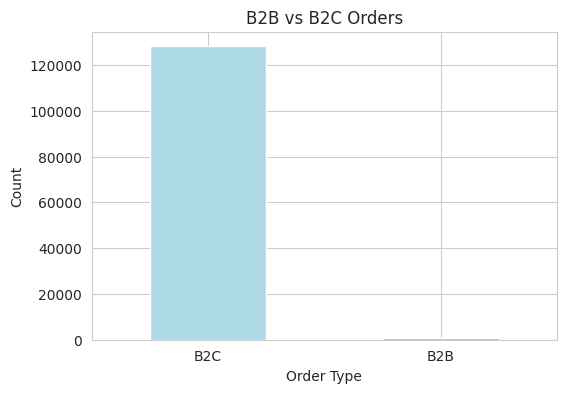

In [43]:
b2b_count = df['B2B'].value_counts()
plt.figure(figsize=(6,4))
b2b_count.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("B2B vs B2C Orders")
plt.xlabel("Order Type")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=["B2C", "B2B"], rotation=0)
plt.show()

###Findings
- 99.3% of orders are B2C
- Expanding B2B offerings could create a new revenue stream.

##Final Discussion & Conclusion

###Strengths of the Analysis
- The EDA appears to provide a detailed breakdown of Amazon India's sales data, including key metrics like revenue, product performance, and trends.
- The use of charts and graphs likely helps in understanding seasonal trends, category performance, and consumer behavior.
- EDA helps detect unusual sales patterns, potential fraud, or issues in pricing strategies.
- If customer demographics, product categories, and pricing tiers were analyzed separately, it improves targeting strategies.
- Expanding B2B offerings could create a new revenue stream.

##Limitations
- If there are missing or inconsistent data points, the conclusions may be biased or misleading.
- While EDA helps in understanding historical trends, it doesn’t necessarily provide predictive analytics for future sales performance.
- Factors like competitor actions, economic conditions, or advertising spend may not be included in the dataset, limiting the depth of insights.

##Business Insights & Implications
- High performing product categories (T-shirts, Shirt)may contribute disproportionately to total sales, indicating where Amazon India should focus marketing efforts.
- The peak 3 months suggests the need for aggressive promotional strategies.
- Targeted marketing in top 10 cities could increase revenue.
- Tshirts & Shirts are frequently purchased, Amazon can optimize its inventory and vendor relationships accordingly.
- Expanding B2B offerings could create a new revenue stream.
- If discounts or pricing adjustments strongly correlate with increased sales, dynamic pricing strategies could improve revenue.
- Gurugram, Thane & Noida show lower sales logistical improvements and targeted promotions necessary.


##Data-Driven Recommendations
- Optimizes Tshirts, shirts and	increase ad spend and promotional campaigns for this best-selling items.
- Improve inventory management to ensure stock availability for Tshirts, shirts products.
- Expanding B2B offerings could create a new revenue stream.
- Test different discount structures to find the most effective pricing model.
- Offer location-based promotions to drive sales in underperforming areas.
- Planning marketing campaigns ahead of peak order months.